In [3]:
import numpy as np
import pandas as pd

In [4]:
births = pd.read_csv('births.csv')

In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
# Integer Division (//): The // operator performs integer division, 
# which divides the year by 10 and discards any remainder. For example:

# If year is 1995, 1995 // 10 results in 199.
# If year is 2003, 2003 // 10 results in 200.
# Multiplication by 10: By multiplying the result of the integer division by 10,
# you convert it back to the starting year of that decade:

# For 1995, you get 199 * 10, which equals 1990.
# For 2003, you get 200 * 10, which equals 2000.

births['decade'] = 10 * (births['year'] // 10)

births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


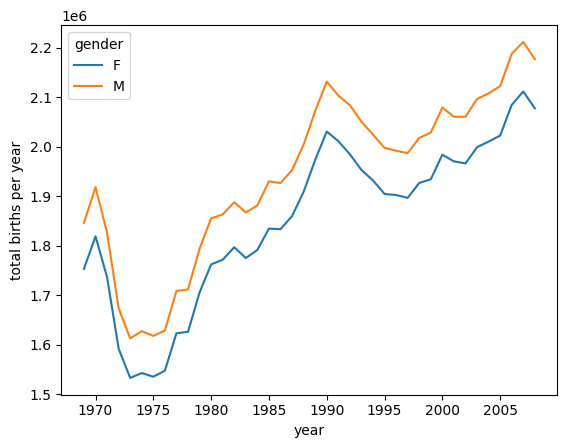

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [8]:
# Though this doesn’t necessarily relate to the pivot table, there are a few more interest‐
# ing features we can pull out of this dataset using the Pandas tools covered up to this
# point. We must start by cleaning the data a bit, removing outliers caused by mistyped
# dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove
# these all at once is to cut outliers; we’ll do this via a robust sigma-clipping operation:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [10]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [11]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

/tmp/ipykernel_2752/1637504459.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


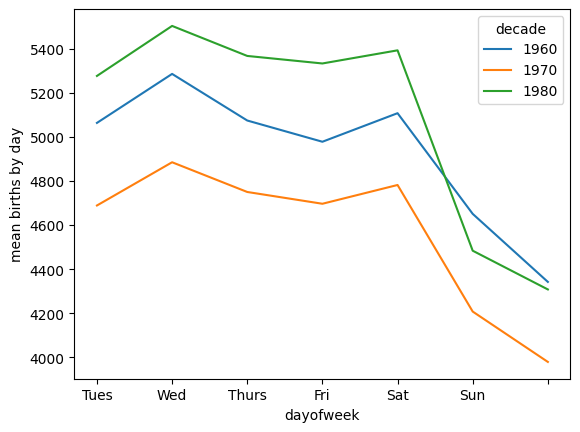

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [13]:
# The result is a multi-index over months and days. To make this easily plottable, let’s
# turn these months and days into a date by associating them with a dummy year vari‐
# able (making sure to choose a leap year so February 29th is correctly handled!)

births_by_date = births.pivot_table('births',
 [births.index.month, births.index.day])
births_by_date.head()



births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [14]:
import pandas as pd

# Assuming births_by_date.index contains tuples of (month, day)
births_by_date.index = [pd.to_datetime(f'2012-{month}-{day}') for (month, day) in births_by_date.index]
births_by_date.head()


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
